# ERA5 


ERA5 products can be downloaded by using the download method of the corresponding product object. For this example we will have a look at the surface temperature of the ERA5 product on single levels at monthly resolution. 

In [1]:
from datetime import datetime
from pansat.products.reanalysis.era5 import ERA5Product

t_0 = datetime(2018, 4, 1, 1)
t_1 = datetime(2018, 5, 1, 1)

# create product instance 
single_mon = ERA5Product('reanalysis-era5-single-levels-monthly-means',  ['2m_temperature'])

In [2]:
files = single_mon.download(t_0, t_1)

2020-10-21 10:51:32,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2020-10-21 10:51:32,573 INFO Request is queued
2020-10-21 10:51:33,625 INFO Request is running
2020-10-21 10:51:35,180 INFO Request is completed
2020-10-21 10:51:35,183 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/data3/adaptor.mars.internal-1603270292.6723251-1128-7-31c08a58-8a39-4fd3-af7b-48013d72254e.nc to ERA5/reanalysis-era5-single-levels-monthly-means/reanalysis-era5-single-levels-monthly-means_20180400:00_2m_temperature.nc (2M)
2020-10-21 10:51:36,108 INFO Download rate 2.2M/s   


file downloaded and saved as ERA5/reanalysis-era5-single-levels-monthly-means/reanalysis-era5-single-levels-monthly-means_20180400:00_2m_temperature.nc


The variable *files* now contains the downloaded files. Now we only need to decipher the data format and extract the data of interest.

In [3]:
import xarray as xr 
import numpy as np 

data = xr.open_dataset(files[0])
display(data)

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2018-04-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-21 08:51:33 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [4]:
# get data points 
temps = data.t2m[0].values
lons = data.longitude.values
lats = data.latitude.values 

In [5]:
# get date of file 
single_mon.filename_to_date(files[0])

datetime.datetime(2018, 4, 1, 0, 0)

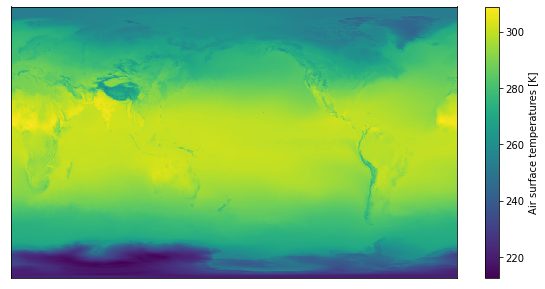

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.pcolormesh(lons, lats, temps, shading = 'auto')
plt.colorbar(label="Air surface temperatures [K]")
plt.xticks([])
plt.yticks([]);
